In [1]:
import pandas as pd

# Sample synthetic data
data = {
    "EngineSize": [1.2, 2.5, 3.0, 0.8, 5.0, 1.8, 0.6, 3.5, 2.0, 4.0],
    "Weight": [1200, 2500, 3200, 900, 4500, 1600, 700, 3500, 2100, 4000],
    "NumWheels": [4, 4, 6, 2, 8, 4, 2, 6, 4, 8],
    "FuelEfficiency": [18, 12, 8, 25, 5, 15, 30, 7, 14, 6],
    "VehicleType": [
        "Car", "Car", "Truck", "Motorcycle", "Bus",
        "Car", "Motorcycle", "Truck", "Car", "Bus"
    ]
}

df = pd.DataFrame(data)
df.to_csv("vehicle_data_knn.csv", index=False)
print(df)


   EngineSize  Weight  NumWheels  FuelEfficiency VehicleType
0         1.2    1200          4              18         Car
1         2.5    2500          4              12         Car
2         3.0    3200          6               8       Truck
3         0.8     900          2              25  Motorcycle
4         5.0    4500          8               5         Bus
5         1.8    1600          4              15         Car
6         0.6     700          2              30  Motorcycle
7         3.5    3500          6               7       Truck
8         2.0    2100          4              14         Car
9         4.0    4000          8               6         Bus


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

         Bus       0.00      0.00      0.00         0
         Car       1.00      0.33      0.50         3
  Motorcycle       0.00      0.00      0.00         0
       Truck       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.25      0.08      0.12         3
weighted avg       1.00      0.33      0.50         3



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sk

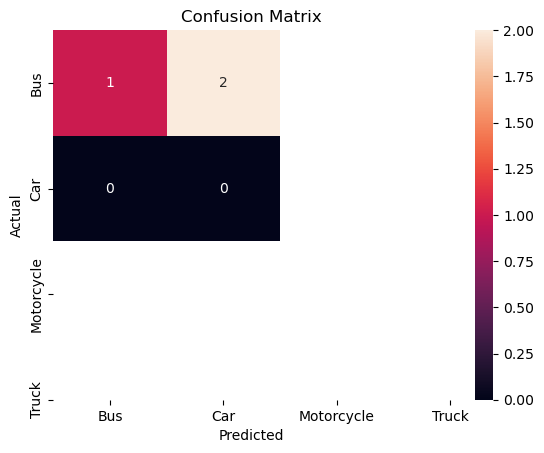

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("vehicle_data_knn.csv")

# Features and target
X = df.drop("VehicleType", axis=1)
y = df["VehicleType"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

# Initialize and train KNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    labels=range(len(le.classes_)),
    target_names=le.classes_
))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
